In this notebook, we work on statistical modelling and forecasting 
 -  Create an equally weighted index
 -  Model and forecast using classical methods:
    -  SMA
    -  Exponential smoothing method
 -  Modelling and forecasting using advanced model:
    -  ARIMA
    -  SARIMA
 -  Model comparison

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, date
# import pmdarima as pm

# chart settings
sns.set_style('whitegrid')
plt.style.use("petroff10")
%matplotlib inline

In [2]:
# Stock selection and acquisition for the last 3 years
tickers = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'TSLA', 'GOOGL', 'JPM', 'V', 'XOM']

end = datetime.now()
start = date(end.year-3, end.month, end.day)

stock_data = {} # store the df in the dictionary
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start, end)
    stock_data[ticker].info()

[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   752 non-null    float64
 1   (High, AAPL)    752 non-null    float64
 2   (Low, AAPL)     752 non-null    float64
 3   (Open, AAPL)    752 non-null    float64
 4   (Volume, AAPL)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   752 non-null    float64
 1   (High, NVDA)    752 non-null    float64
 2   (Low, NVDA)     752 non-null    float64
 3   (Open, NVDA)    752 non-null    float64
 4   (Volume, NVDA)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   752 non-null    float64
 1   (High, MSFT)    752 non-null    float64
 2   (Low, MSFT)     752 non-null    float64
 3   (Open, MSFT)    752 non-null    float64
 4   (Volume, MSFT)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   752 non-null    float64
 1   (High, AMZN)    752 non-null    float64
 2   (Low, AMZN)     752 non-null    float64
 3   (Open, AMZN)    752 non-null    float64
 4   (Volume, AMZN)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   752 non-null    float64
 1   (High, META)    752 non-null    float64
 2   (Low, META)     752 non-null    float64
 3   (Open, META)    752 non-null    float64
 4   (Volume, META)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   752 non-null    float64
 1   (High, TSLA)    752 non-null    float64
 2   (Low, TSLA)     752 non-null    float64
 3   (Open, TSLA)    752 non-null    float64
 4   (Volume, TSLA)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   752 non-null    float64
 1   (High, GOOGL)    752 non-null    float64
 2   (Low, GOOGL)     752 non-null    float64
 3   (Open, GOOGL)    752 non-null    float64
 4   (Volume, GOOGL)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, JPM)   752 non-null    float64
 1   (High, JPM)    752 non-null    float64
 2   (Low, JPM)     752 non-null    float64
 3   (Open, JPM)    752 non-null    float64
 4   (Volume, JPM)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (Close, V)   752 non-null    float64
 1   (High, V)    752 non-null    float64
 2   (Low, V)     752 non-null    float64
 3   (Open, V)    752 non-null    float64
 4   (Volume, V)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, XOM)   752 non-null    float64
 1   (High, XOM)    752 non-null    float64
 2   (Low, XOM)     752 non-null    float64
 3   (Open, XOM)    752 non-null    float64
 4   (Volume, XOM)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


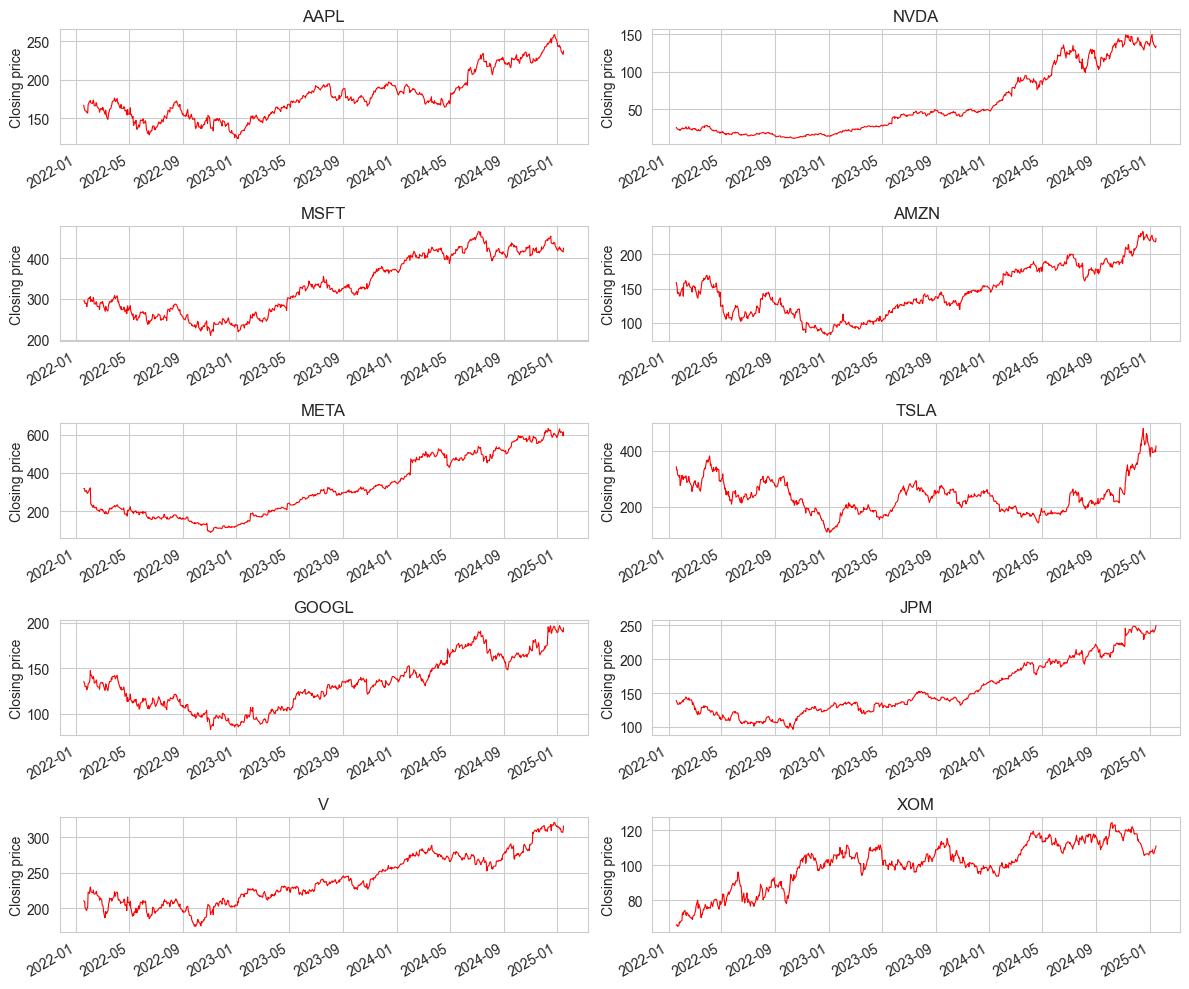

In [3]:
# visualizing the historical trend in the closing price of each Stock in a compact form

plt.figure(figsize=(12, 10))
plt.subplots_adjust(top=1.25, bottom=1.2, hspace=1.2)

for i, ticker in enumerate(tickers, 1):
    ax = plt.subplot(5, 2, i)
    stock_data[ticker]['Close'].plot(ax = ax, linewidth = 0.8, color = "red")

    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")
    ax.set_ylabel("Closing price", labelpad=2, fontsize = 10)

plt.tight_layout()

            Equal_Weighted_Index        Norm
Date                                        
2022-01-18            185.850145  100.000000
2022-01-19            183.800214   98.896998
2022-01-20            182.311527   98.095984
2022-01-21            176.048841   94.726233
2022-01-24            175.972890   94.685366
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-18 to 2025-01-15
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Equal_Weighted_Index  752 non-null    float64
 1   Norm                  752 non-null    float64
dtypes: float64(2)
memory usage: 17.6 KB


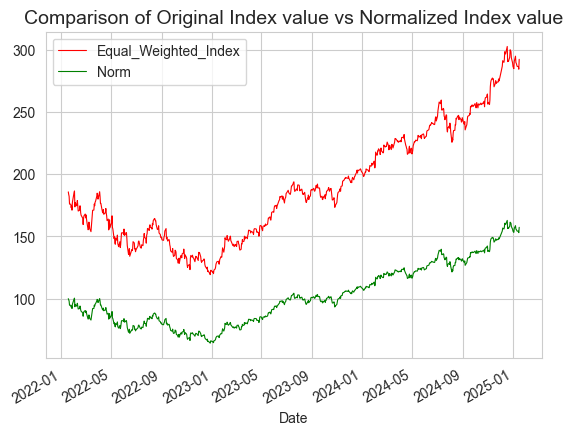

In [4]:
# creating an Equal Weighted Index

# step 1: evaluate the equal weights
equal_weight = 100/len(tickers)

# create a dataframe that stores the closing prices of each stock 
close_price_df = pd.concat({ticker: c_df[f'Close'] for ticker, c_df in stock_data.items()}, axis=1)

close_price_df.columns = [f'{ticker}_Close' for ticker in stock_data.keys()] # assign proper column names

# create a new dataframe with equal-weighted closing prices 
close_eq = pd.DataFrame(close_price_df/equal_weight)

# creating the Equal weighted index dataframe
EWI = pd.DataFrame(close_eq.sum(axis=1))
EWI.columns = ['Equal_Weighted_Index']
EWI.head()

# normalize the index
base_value = 100
divisor = EWI.iloc[0]/base_value

EWI['Norm'] = EWI/divisor
print(EWI.head())

# graphical representation of the original index value vs the normalized value
EWI.plot(linewidth = 0.8, color = ('red', 'green')).set_title('Comparison of Original Index value vs Normalized Index value', fontsize = 14)
EWI.info()


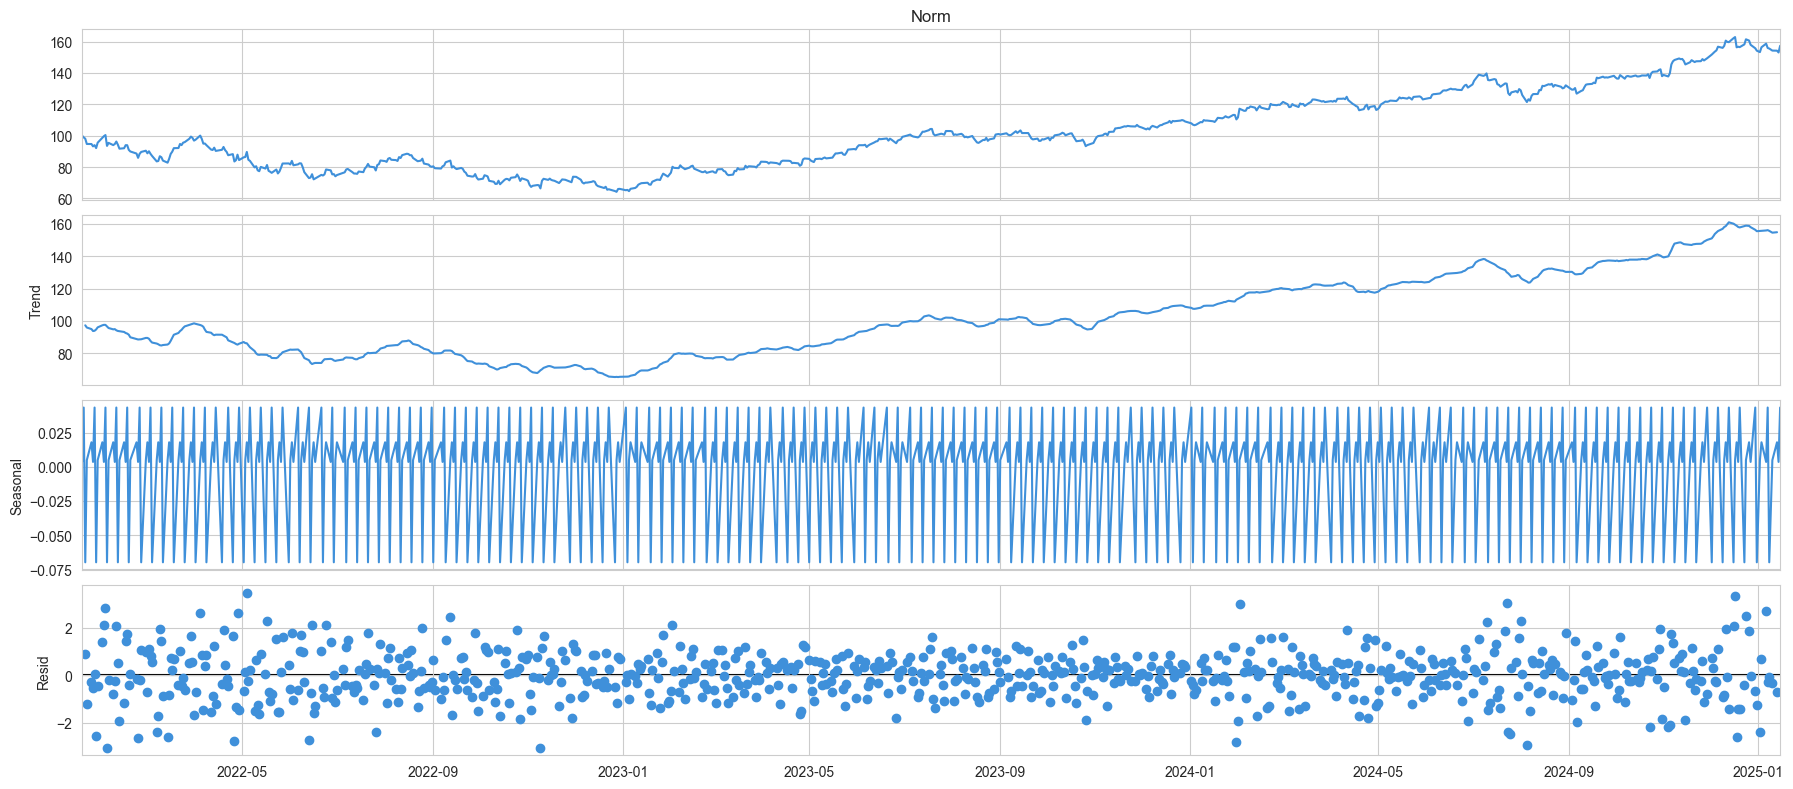

In [5]:
# checking for seasonality and trend
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_EWI_add = sm.tsa.seasonal_decompose(EWI['Norm'], model='additive', period=5)
fig = decomposition_EWI_add.plot()
plt.show()

In [6]:
residual_add = decomposition_EWI_add.resid
residual_add.describe()

count    748.000000
mean      -0.001981
std        0.986685
min       -3.034614
25%       -0.615074
50%        0.023418
75%        0.564118
max        3.457908
Name: resid, dtype: float64

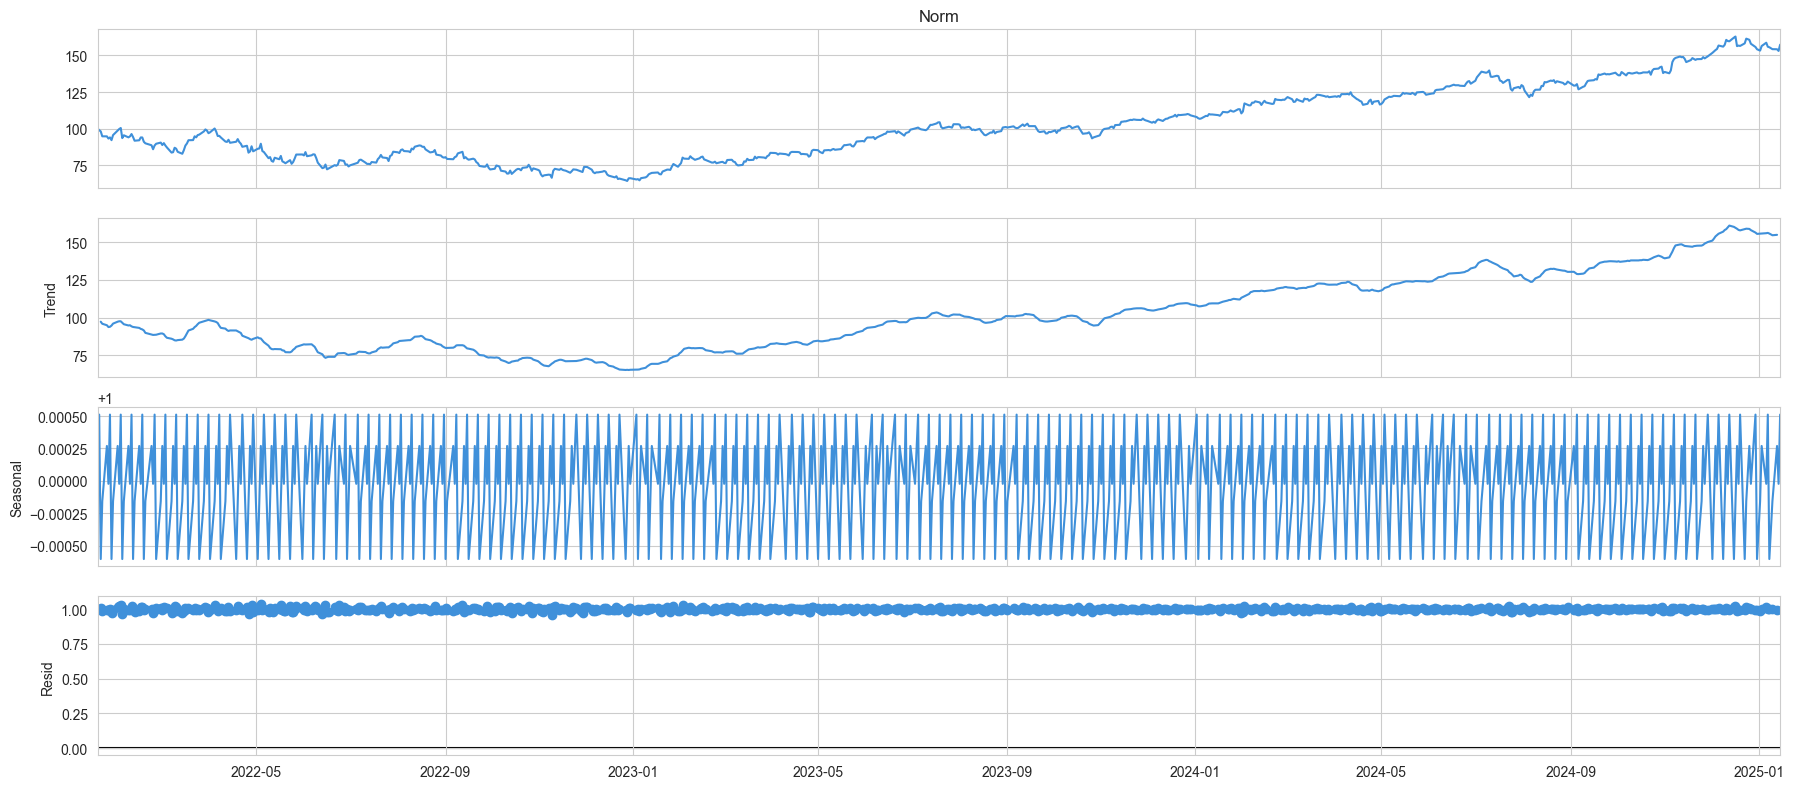

In [7]:
decomposition_EWI_mul = sm.tsa.seasonal_decompose(EWI['Norm'], model='multiplicative', period=5)
fig = decomposition_EWI_mul.plot()
plt.show()

In [8]:
residual_mul = decomposition_EWI_mul.resid
residual_mul.describe()

count    748.000000
mean       0.999935
std        0.010366
min        0.956375
25%        0.993500
50%        1.000190
75%        1.005726
max        1.040056
Name: resid, dtype: float64

We set the period of seasonal_decompose at 5 beacuse the closing prices are recorded daily (leaving out the weekends), and have a weekly repitition.The plots above show the existence of both trend and seasonality in our data, along with the existence of residuals. In order to ensure proper forecasting we will thus use both classical methods (SMA and seasonal exponential smoothening) as well as advanced methods (ARIMA and SARIMA), and compare which of the models provide an appropriate fit for our data.

In [9]:
seasonal_add = decomposition_EWI_add.seasonal
seasonal_mul = decomposition_EWI_mul.seasonal

In [10]:
trend_add = decomposition_EWI_add.trend
trend_mul = decomposition_EWI_mul.trend

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_analysis(timeseries):
   print(f'Result of Augmented Dickey-Fuller test:')
   adftest = adfuller(timeseries, autolag='AIC')
   adfout = pd.Series(adftest[0:4], index = ['ADF Statistics', 'p-value','# of lags', '# of observations'])
   for key, value in adftest[4].items():
      adfout[f'Critical value at {key}%'] = value
   print(adfout)
   if (adftest[0] > value for value in adftest[4].items()) and adftest[1] > 0.05: 
      #p-value greater than threshold of 0.05 and ADF statistics greater than critical vlaues means data is not stationary
      print('Null hypothesis accepted and data is time-dependent')
   else:
      print('Data is stationary')

In [12]:
adf_analysis(trend_add.dropna())

Result of Augmented Dickey-Fuller test:
ADF Statistics              1.363862
p-value                     0.996944
# of lags                  20.000000
# of observations         727.000000
Critical value at 1%%      -3.439377
Critical value at 5%%      -2.865524
Critical value at 10%%     -2.568891
dtype: float64
Null hypothesis accepted and data is time-dependent


In [13]:
adf_analysis(trend_mul.dropna())

Result of Augmented Dickey-Fuller test:
ADF Statistics              1.363862
p-value                     0.996944
# of lags                  20.000000
# of observations         727.000000
Critical value at 1%%      -3.439377
Critical value at 5%%      -2.865524
Critical value at 10%%     -2.568891
dtype: float64
Null hypothesis accepted and data is time-dependent


In [14]:
adf_analysis(seasonal_add)

Result of Augmented Dickey-Fuller test:
ADF Statistics           -5.354282e+15
p-value                   0.000000e+00
# of lags                 1.500000e+01
# of observations         7.360000e+02
Critical value at 1%%    -3.439266e+00
Critical value at 5%%    -2.865475e+00
Critical value at 10%%   -2.568865e+00
dtype: float64
Data is stationary


In [15]:
adf_analysis(seasonal_mul)

Result of Augmented Dickey-Fuller test:
ADF Statistics            2.101809e-13
p-value                   9.585321e-01
# of lags                 8.000000e+00
# of observations         7.430000e+02
Critical value at 1%%    -3.439182e+00
Critical value at 5%%    -2.865438e+00
Critical value at 10%%   -2.568846e+00
dtype: float64
Null hypothesis accepted and data is time-dependent


In [16]:
residual_add.dropna(inplace=True)
adf_analysis(residual_add)

Result of Augmented Dickey-Fuller test:
ADF Statistics           -1.123787e+01
p-value                   1.838090e-20
# of lags                 1.800000e+01
# of observations         7.290000e+02
Critical value at 1%%    -3.439352e+00
Critical value at 5%%    -2.865513e+00
Critical value at 10%%   -2.568886e+00
dtype: float64
Data is stationary


In [17]:
residual_mul.dropna(inplace=True)
adf_analysis(residual_mul)

Result of Augmented Dickey-Fuller test:
ADF Statistics           -1.131714e+01
p-value                   1.198870e-20
# of lags                 1.800000e+01
# of observations         7.290000e+02
Critical value at 1%%    -3.439352e+00
Critical value at 5%%    -2.865513e+00
Critical value at 10%%   -2.568886e+00
dtype: float64
Data is stationary


The trend for both the additive and multiplicative seasonal decompose demonstrate the same p-value, however, from the p-value of the Augmented Dickey-Fuller test on residuals for both the additive and multiplicative model, we find that it is smaller for the multiplicative model at 1.008353e-20 ( much less than 0.05). We also conclude that the seasonal component is additive because it has a p-value of 0 for additive decomposition.

In [18]:
# performing ADF on our EWI to check for stationarity
adf_analysis(EWI['Norm'])

Result of Augmented Dickey-Fuller test:
ADF Statistics              0.637073
p-value                     0.988495
# of lags                   0.000000
# of observations         751.000000
Critical value at 1%%      -3.439087
Critical value at 5%%      -2.865396
Critical value at 10%%     -2.568823
dtype: float64
Null hypothesis accepted and data is time-dependent


-  We see that the data is non-stationary, which was expected because it had seasonal components to it. 
-  Statistical forecasting methods require data to be stationary.
-  In order for predictive modelling and forecasting, we try to impose stationarity through tranformations.

Forecasting a stationary series is relatively easy and the forecasts are more reliable. An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

In [19]:
# applying transformation to the data

# log transformation
EWI['log_Norm'] = np.log(EWI['Norm'])

# square root transformation
EWI['sqrt_Norm'] = np.sqrt(EWI['Norm'])

# cube root transformation
EWI['cbrt_Norm'] = np.cbrt(EWI['Norm'])

EWI.head()

,Equal_Weighted_Index,Norm,log_Norm,sqrt_Norm,cbrt_Norm
Date,,,,,
2022-01-18,185.850145,100.000000,4.605170,10.000000,4.641589
2022-01-19,183.800214,98.896998,4.594079,9.944697,4.624460
2022-01-20,182.311527,98.095984,4.585946,9.904342,4.611941
2022-01-21,176.048841,94.726233,4.550991,9.732740,4.558515
2022-01-24,175.972890,94.685366,4.550559,9.730641,4.557860


In [20]:
adf_analysis(EWI['log_Norm'])

Result of Augmented Dickey-Fuller test:
ADF Statistics              0.087663
p-value                     0.965209
# of lags                   0.000000
# of observations         751.000000
Critical value at 1%%      -3.439087
Critical value at 5%%      -2.865396
Critical value at 10%%     -2.568823
dtype: float64
Null hypothesis accepted and data is time-dependent


In [21]:
adf_analysis(EWI['sqrt_Norm'])

Result of Augmented Dickey-Fuller test:
ADF Statistics              0.362605
p-value                     0.980041
# of lags                   0.000000
# of observations         751.000000
Critical value at 1%%      -3.439087
Critical value at 5%%      -2.865396
Critical value at 10%%     -2.568823
dtype: float64
Null hypothesis accepted and data is time-dependent


In [22]:
adf_analysis(EWI['cbrt_Norm'])

Result of Augmented Dickey-Fuller test:
ADF Statistics              0.270286
p-value                     0.975939
# of lags                   0.000000
# of observations         751.000000
Critical value at 1%%      -3.439087
Critical value at 5%%      -2.865396
Critical value at 10%%     -2.568823
dtype: float64
Null hypothesis accepted and data is time-dependent


None of the above transformations have made the data stationary. We now use the rolling means method.

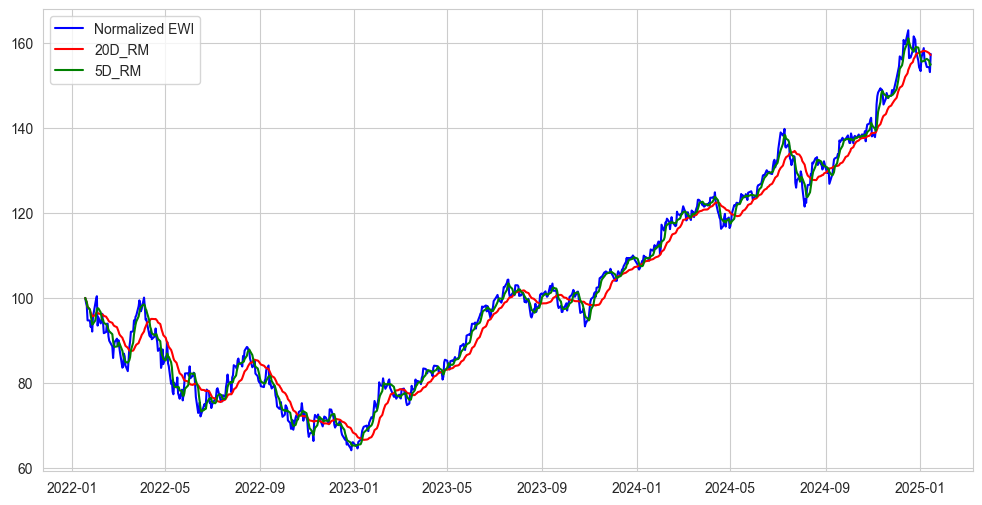

In [23]:
# evaluate rolling means for windows of 5 days and 20 days
roll_ma_20 = EWI['Norm'].rolling(window=20,min_periods=1).mean()
roll_ma_5 = EWI['Norm'].rolling(window=5,min_periods=1).mean()

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(EWI['Norm'], color = 'blue', label = 'Normalized EWI')
axes.plot(roll_ma_20, color = 'red', label = '20D_RM' )
axes.plot(roll_ma_5, color = 'green', label = '5D_RM' )

plt.legend()

In [24]:
# subtract SMA from original data, remove NaNs and check for stationarity

# 5 day window
roll_ma_5_sub = EWI['Norm'] - roll_ma_5
roll_ma_5_sub.dropna(inplace=True)

adf_analysis(roll_ma_5_sub)

Result of Augmented Dickey-Fuller test:
ADF Statistics           -7.857798e+00
p-value                   5.384186e-12
# of lags                 1.300000e+01
# of observations         7.380000e+02
Critical value at 1%%    -3.439242e+00
Critical value at 5%%    -2.865464e+00
Critical value at 10%%   -2.568860e+00
dtype: float64
Data is stationary


In [25]:
# 20 day window
roll_ma_20_sub = EWI['Norm'] - roll_ma_20
roll_ma_20_sub.dropna(inplace=True)

adf_analysis(roll_ma_20_sub)


Result of Augmented Dickey-Fuller test:
ADF Statistics           -6.830550e+00
p-value                   1.898592e-09
# of lags                 9.000000e+00
# of observations         7.420000e+02
Critical value at 1%%    -3.439194e+00
Critical value at 5%%    -2.865443e+00
Critical value at 10%%   -2.568848e+00
dtype: float64
Data is stationary


We have obtained stationarity in our data by subtracting the rolling means. Out of the 5 day window and the 20 day window, the rolling mean for the 5 day window performs better with a p-value of 4.428361e-12.

<Axes: xlabel='Date'>

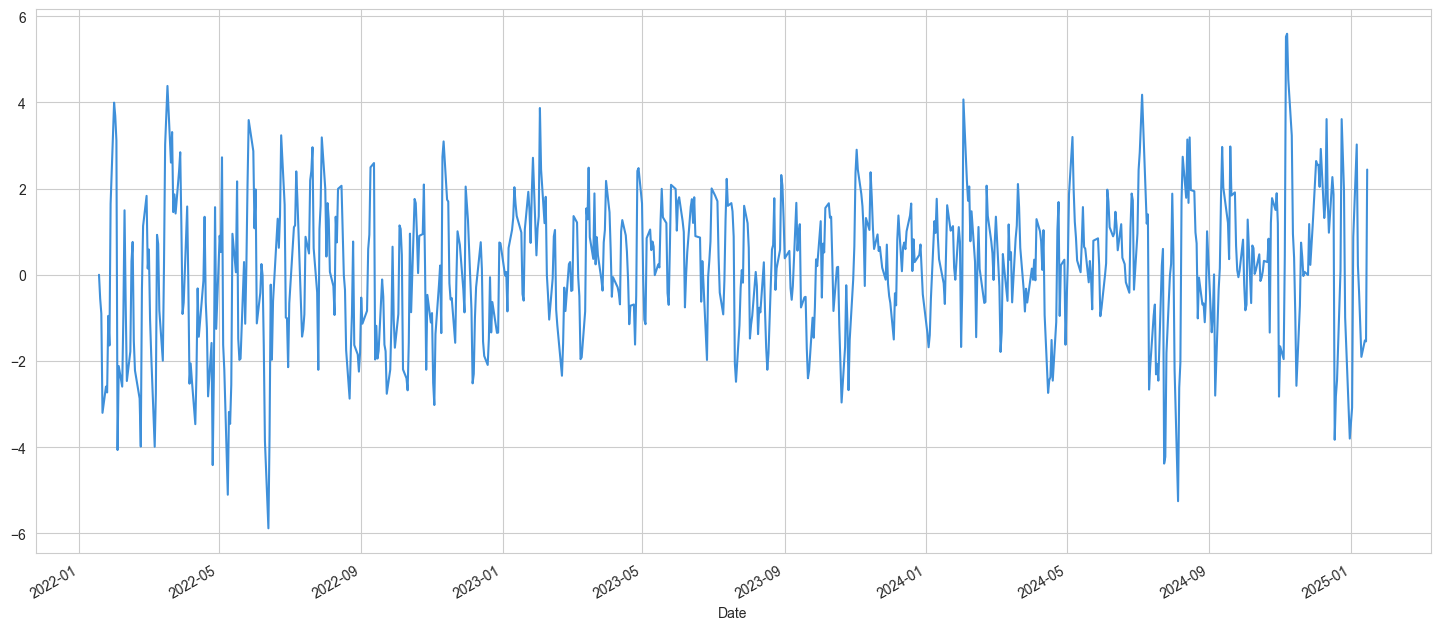

In [26]:
EWI['RM5'] = roll_ma_5_sub
EWI.head()

EWI['RM5'].plot()

Date
2022-01-18         NaN
2022-01-19   -1.103002
2022-01-20   -0.801015
2022-01-21   -3.369751
2022-01-24   -0.040867
2022-01-25   -1.496875
2022-01-26    0.794296
2022-01-27   -1.886850
2022-01-28    3.453774
2022-01-31    3.147563
Name: Norm, dtype: float64
Result of Augmented Dickey-Fuller test:
ADF Statistics            -27.668093
p-value                     0.000000
# of lags                   0.000000
# of observations         750.000000
Critical value at 1%%      -3.439099
Critical value at 5%%      -2.865401
Critical value at 10%%     -2.568826
dtype: float64
Data is stationary


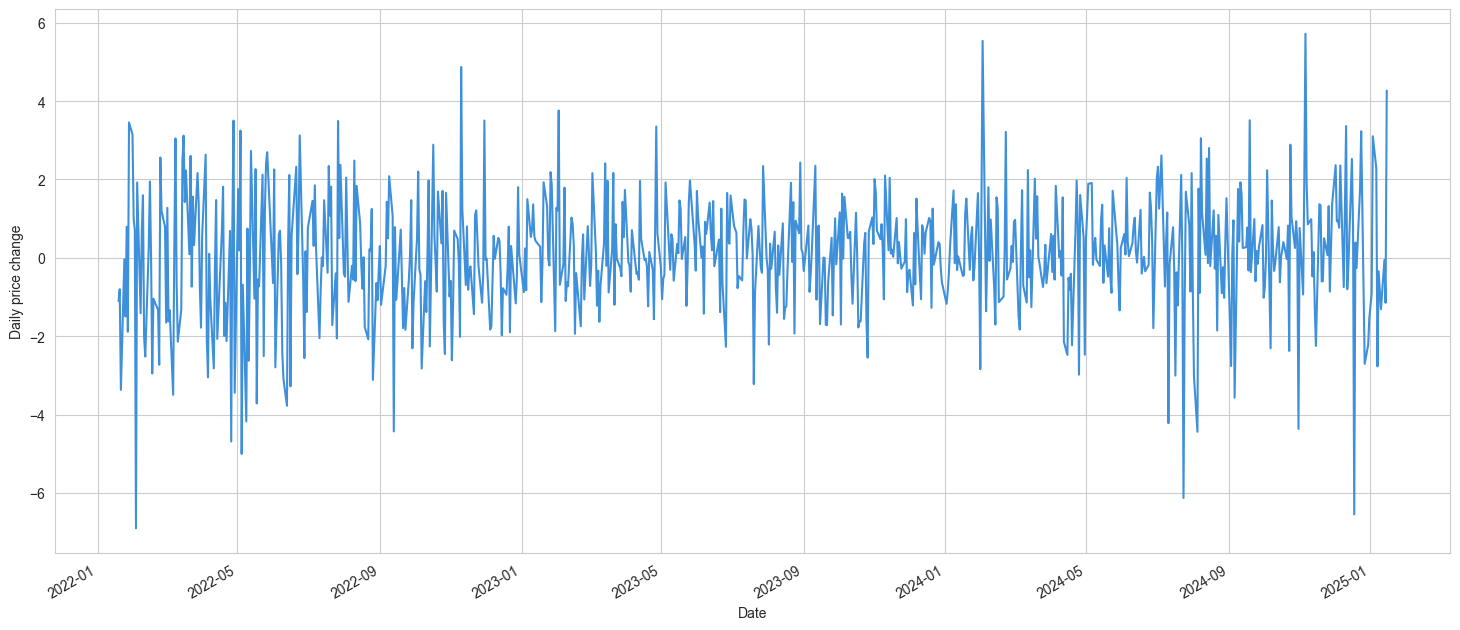

In [27]:
# we now use the differencing method to check if it gives us better statistics as compared to the rolling mean method.
data_diff = EWI['Norm'].diff(periods=1)
print(data_diff.head(10))

data_diff.dropna(inplace=True)
adf_analysis(data_diff)
data_diff.plot()
plt.ylabel('Daily price change')

EWI['differenced_Norm'] = data_diff


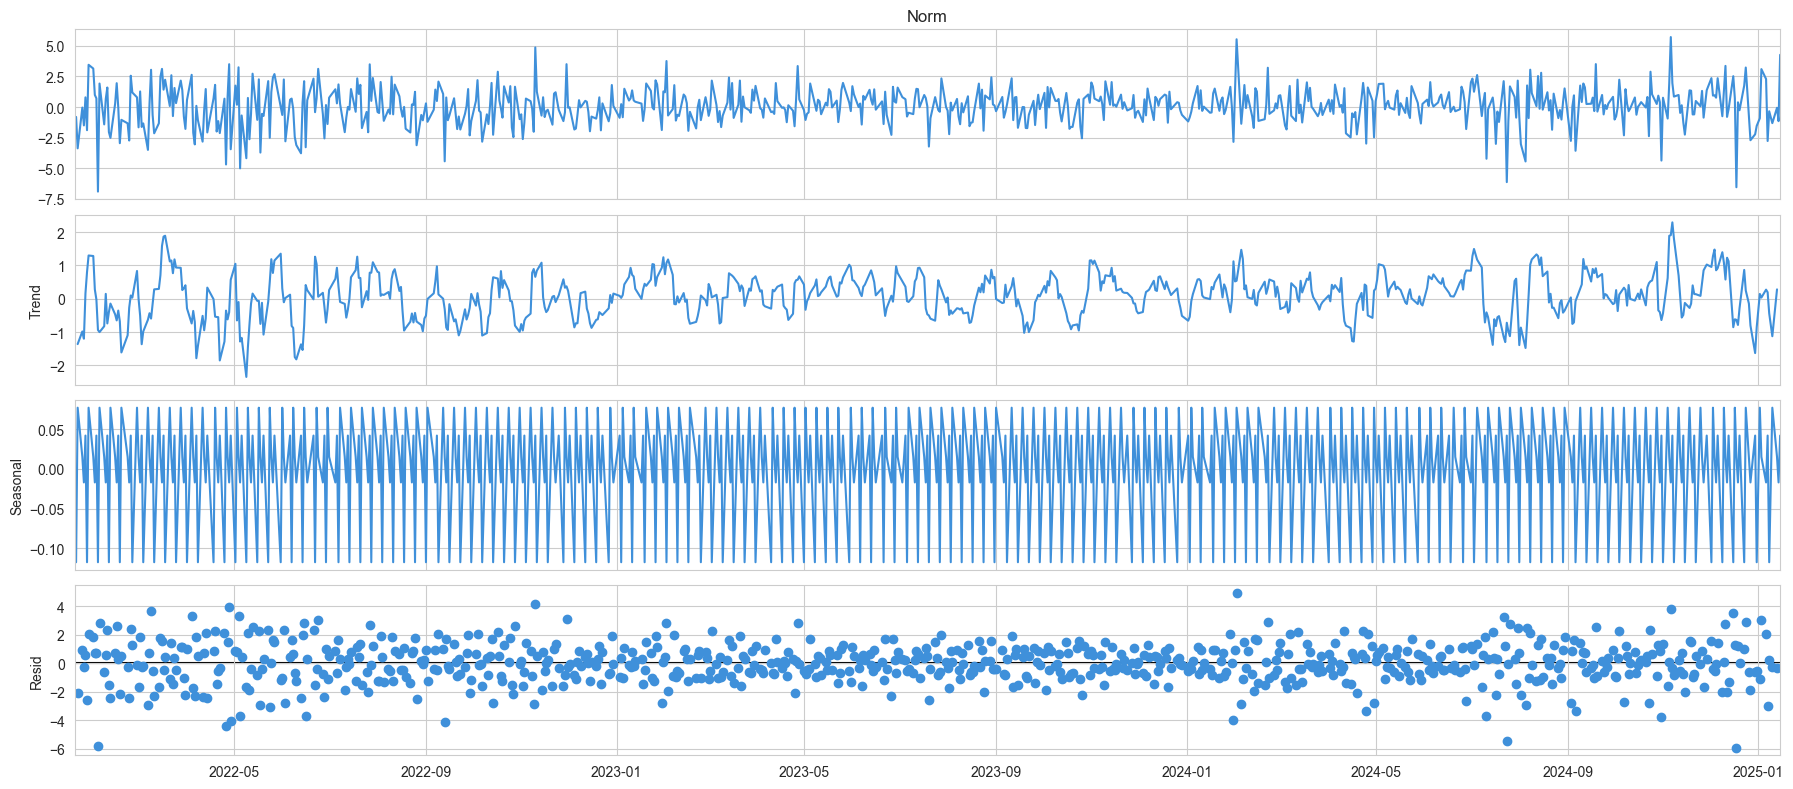

In [28]:
decomposition_datadiff_mul = sm.tsa.seasonal_decompose(data_diff, period=5)
fig = decomposition_datadiff_mul.plot()
plt.show()

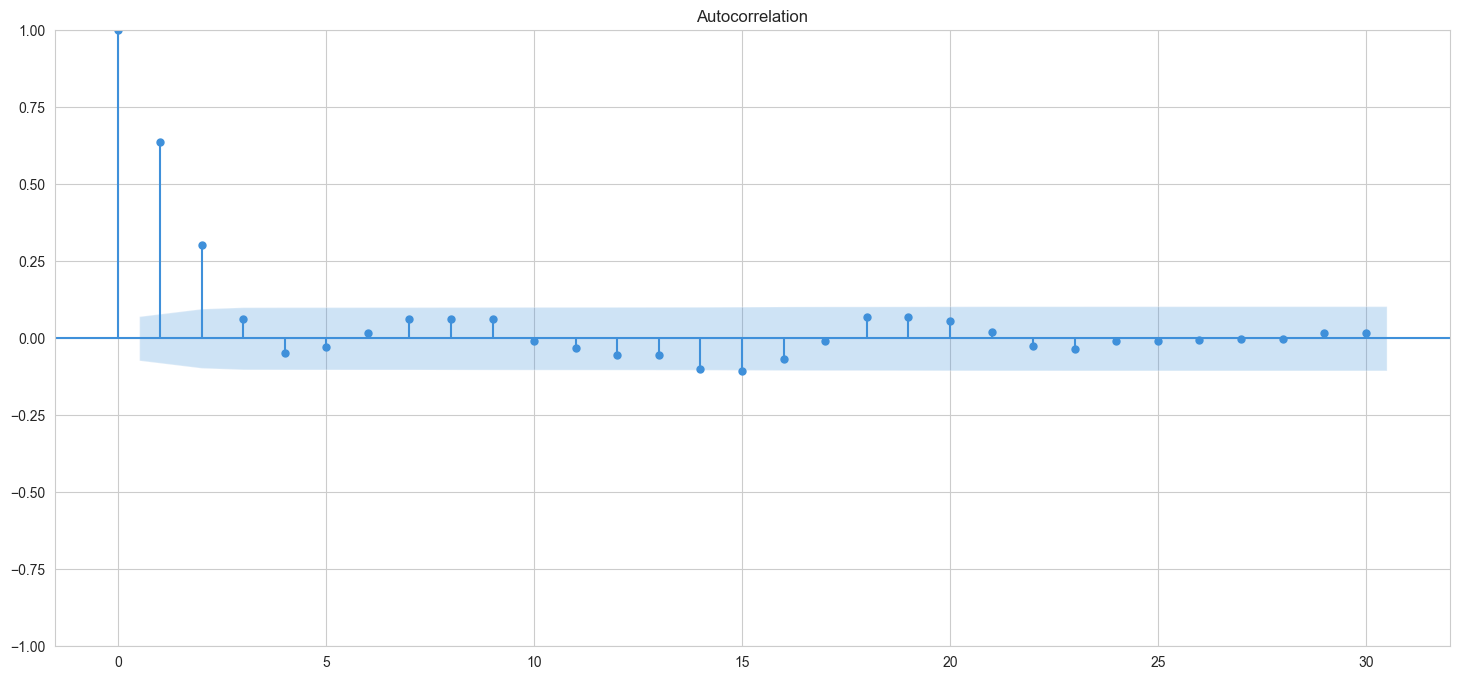

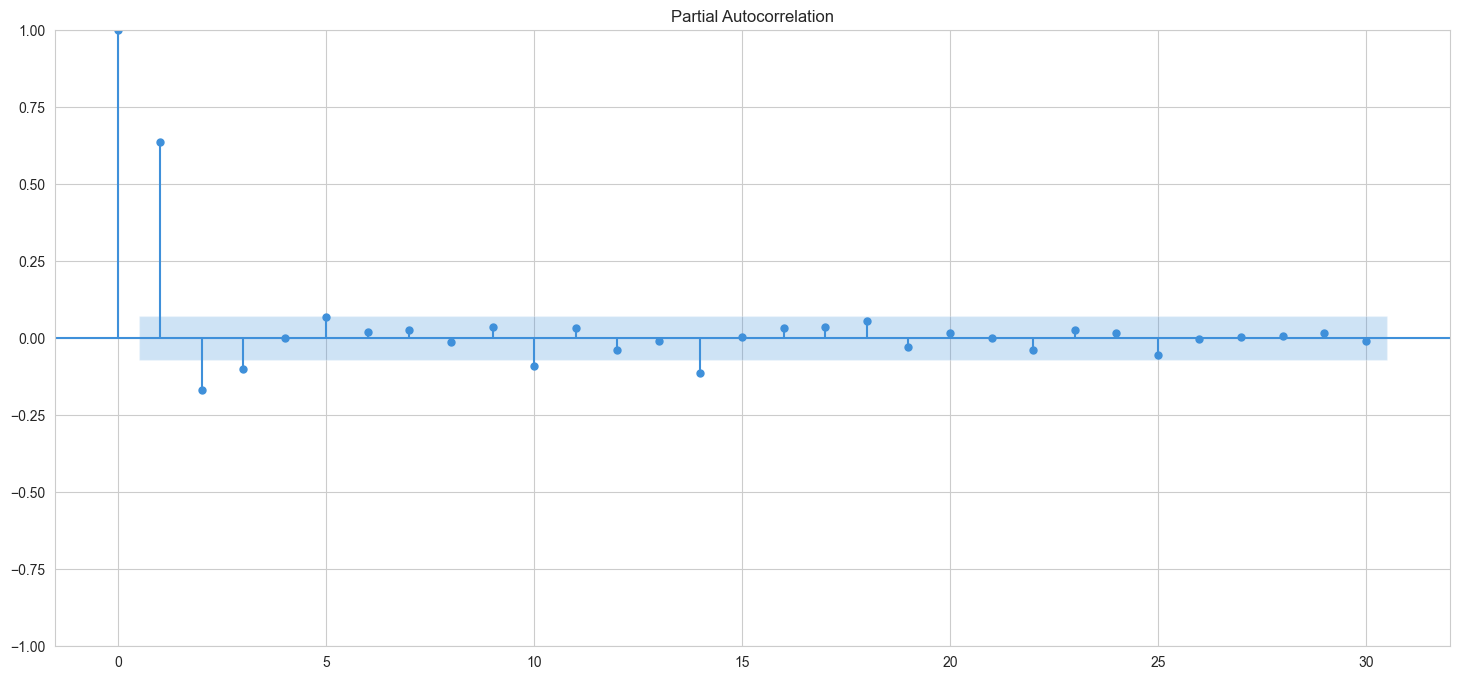

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(EWI['RM5'], lags=30)
plot_pacf(EWI['RM5'], lags=30)
plt.show()

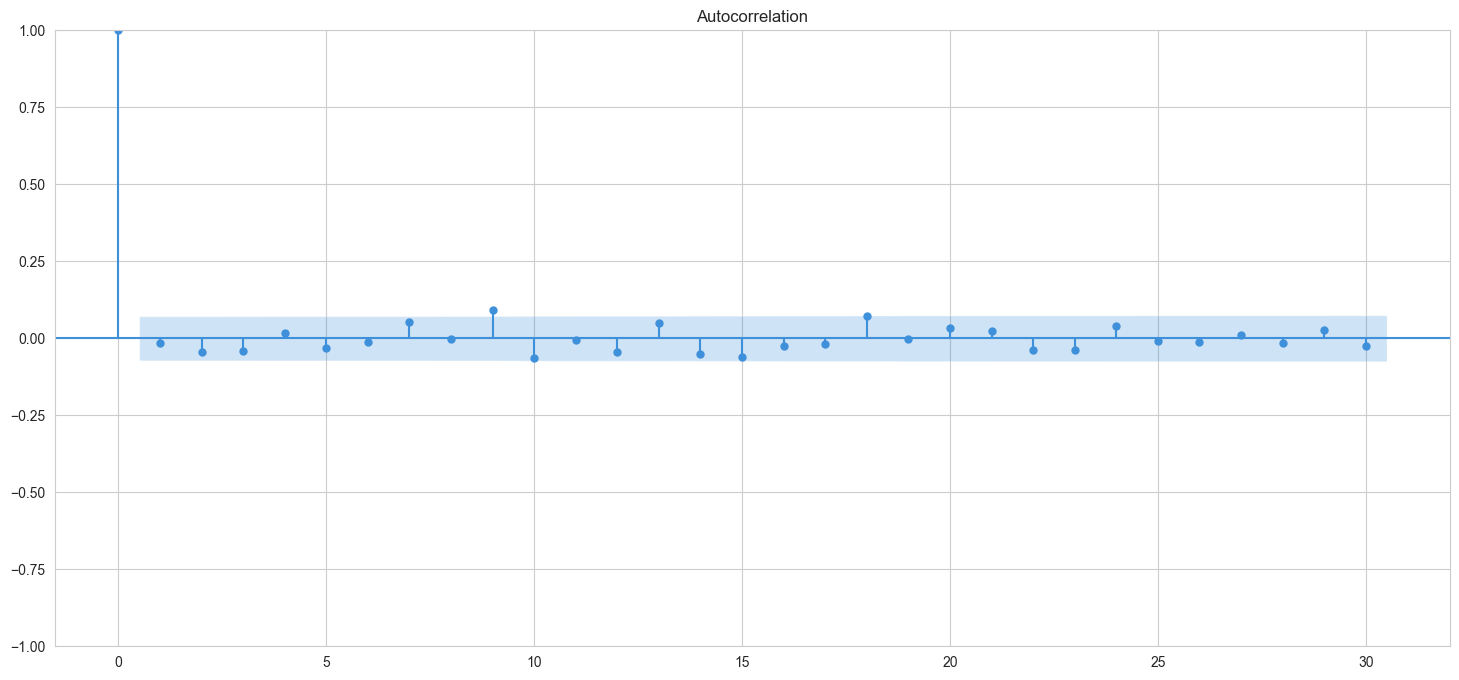

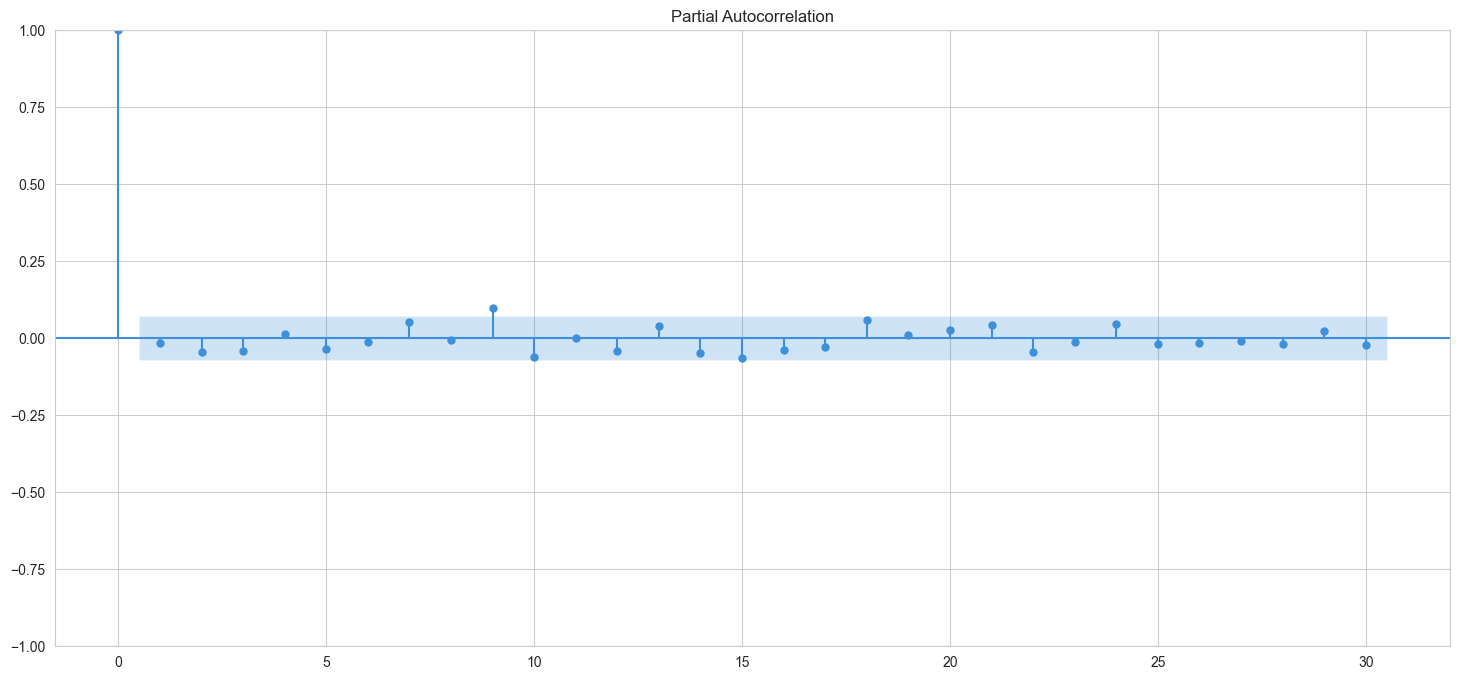

In [30]:
plot_acf(data_diff, lags=30)
plot_pacf(data_diff, lags=30)
plt.show()

From the ACF and PACF plots comparison for the rolling mean 5-day-window transformation and the differencing transformation, differencing is a better choice because it has very little to no correlation between the predictor variables.
The data is now ready for fitting and forecast.

C:\Users\sreya\AppData\Local\Temp\ipykernel_40708\3609158107.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SMA_model['forecast_value'][train_length:] = SMA_model['forecast_value'][train_length-1] # forecasting values
C:\Users\sreya\AppData\Local\Temp\ipykernel_40708\3609158107.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Us

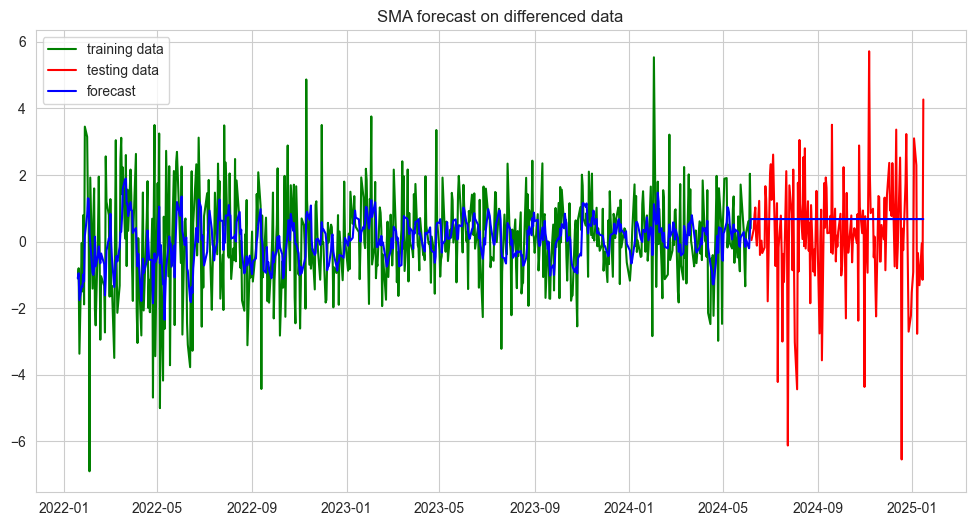

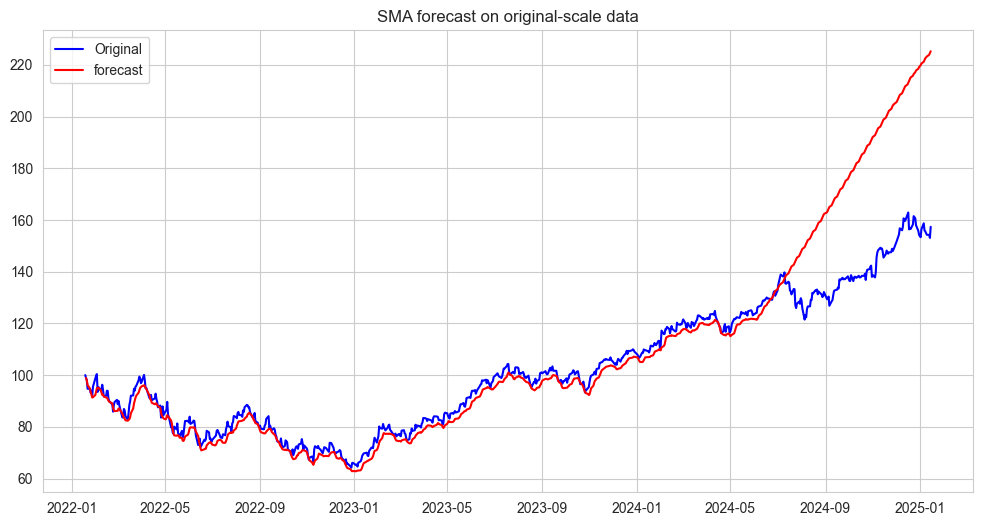

In [31]:
# Forecasting using the simple moving average (SMA) model

# split the data into training and test set. We do the forecasting on the test set itself to check for model efficacy.
train_length = 600
train_set = EWI['differenced_Norm'][0:train_length].dropna()
test_set = EWI['differenced_Norm'][train_length:]

# fit the SMA model to the data for a 5 day window
SMA_model = EWI.copy()
SMA_model['forecast_value'] = EWI['differenced_Norm'].rolling(window=5,min_periods=1).mean() # fitting the model to data
SMA_model['forecast_value'][train_length:] = SMA_model['forecast_value'][train_length-1] # forecasting values

# plotting the training and testing set against the forecast value to check for model accuracy
fig, axes = plt.subplots(figsize=(12,6))
axes.plot(train_set, color = 'green', label = 'training data')
axes.plot(test_set, color = 'red', label = 'testing data')
axes.plot(SMA_model['forecast_value'], color = 'blue', label = 'forecast')
plt.title('SMA forecast on differenced data')
plt.legend()

# to check the forecast in the original scale
last_value = EWI['Norm'].iloc[0]
SMA_model['forecast_original_scale'] = SMA_model['forecast_value'].cumsum() + last_value

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(EWI['Norm'], color = 'blue', label = 'Original')
axes.plot(SMA_model['forecast_original_scale'], color = 'red', label = 'forecast')
plt.title('SMA forecast on original-scale data')
plt.legend()



In [32]:
# calculating the RMSE and MAPE for the SMA model

from sklearn.metrics import mean_squared_error

rmse_sma_model = np.sqrt(mean_squared_error(test_set, SMA_model['forecast_value'][train_length:])).round(4)
print(rmse_sma_model)

# calculating MAPE (scale-free)
def MAPE(actual, predicted):
    mape_value = np.round((np.mean(np.abs((actual-predicted) / actual))*100),4)
    return mape_value

mape_SMA = MAPE(test_set.values,SMA_model['forecast_value'][train_length:].values)
    

1.8466


1.7853
5.5494
178.6827 3.2675


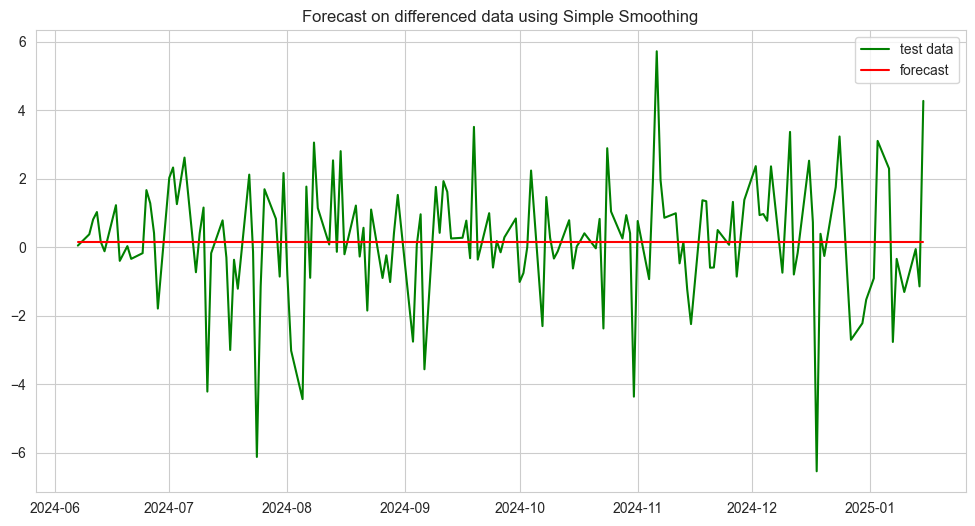

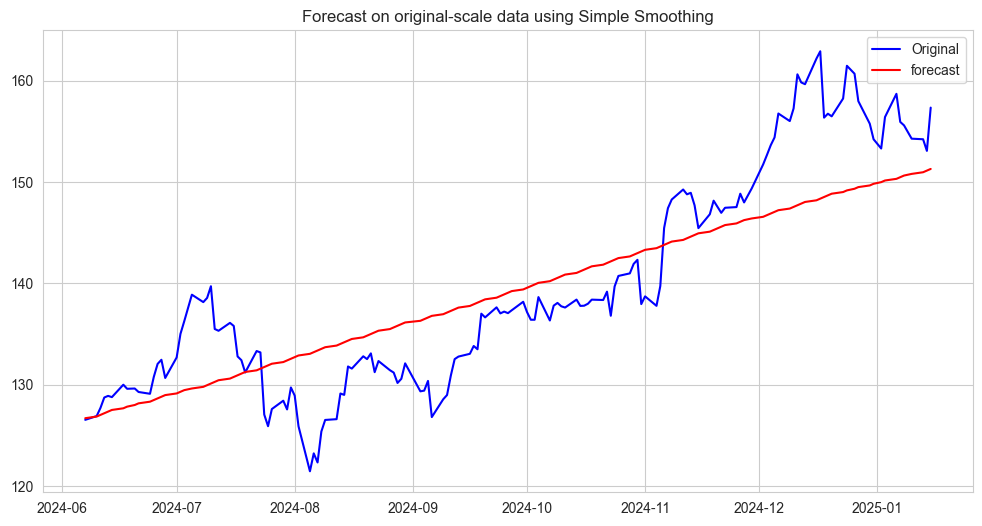

In [33]:
# Forecasting using the exponential smoothing method

train_length = 600
train_set = EWI['differenced_Norm'][0:train_length].dropna()
test_set = EWI['differenced_Norm'][train_length:]

# Case 1: Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fitting model to training set
model = SimpleExpSmoothing(train_set.values).fit() 

# forecasting on the testing set
model_pred = model.predict(start = len(train_set), end = len(EWI['differenced_Norm'].dropna())-1) 

fig, axes = plt.subplots(figsize=(12,6))
# axes.plot(train_set, color = 'blue', label = 'train data')
axes.plot(test_set, color = 'green', label = 'test data')
axes.plot(test_set.index, model_pred, color = 'red', label = 'forecast')
plt.title('Forecast on differenced data using Simple Smoothing')
plt.legend()

# checking forecast in original scale
last_value_ses = EWI['Norm'].iloc[train_length]
model_pred_ogscale = model_pred.cumsum() + last_value_ses

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(EWI['Norm'][train_length:], color = 'blue', label = 'Original')
axes.plot(test_set.index, model_pred_ogscale, color = 'red', label = 'forecast')
plt.title('Forecast on original-scale data using Simple Smoothing')
plt.legend()


# RMSE of SES model
rmse_ses = np.sqrt(mean_squared_error(test_set, model_pred)).round(4)
print(rmse_ses)
rmse_ses_og = np.sqrt(mean_squared_error(EWI['Norm'][train_length:].values, model_pred_ogscale)).round(4)
print(rmse_ses_og)

# MAPE of SES model
mape_SES = MAPE(test_set, model_pred)
print(mape_SES,MAPE(EWI['Norm'][train_length:].values, model_pred_ogscale))



1.7933026276674577 7.400410608165315
133.2006 3.7577


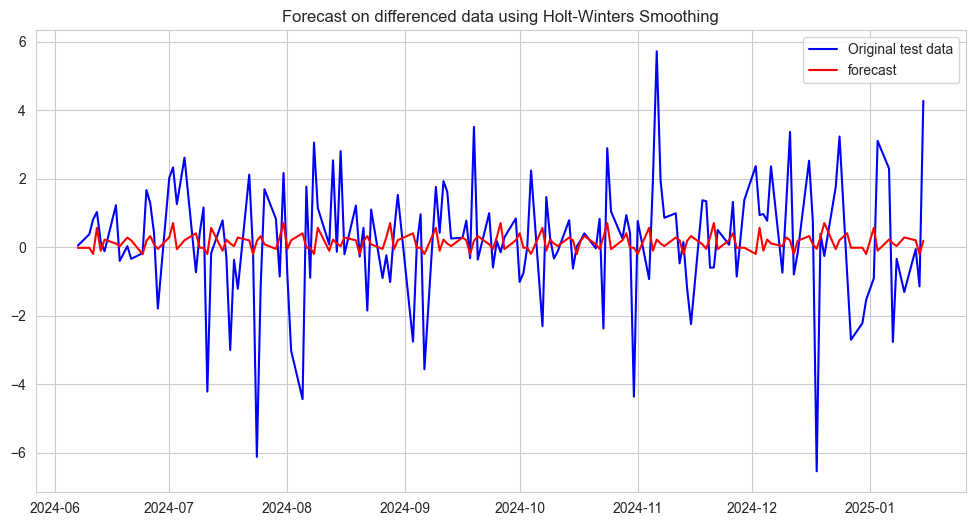

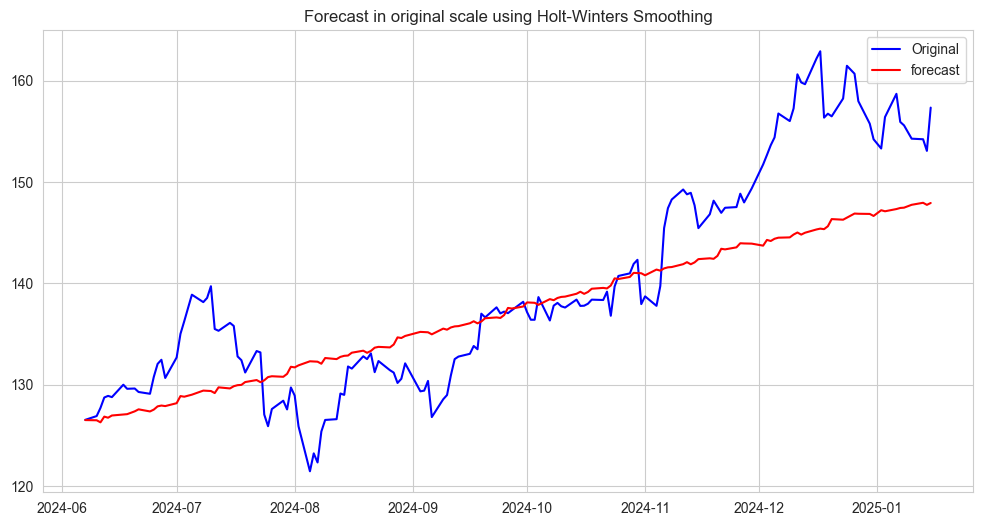

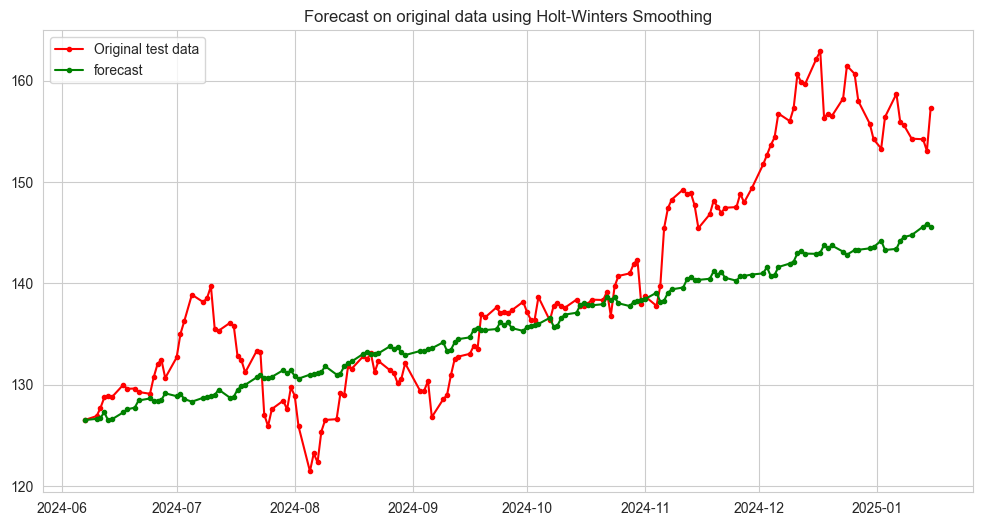

In [34]:
# Case 2: Triple Exponential Smoothing or Holt-Winters Smoothing model. 
# This model tries to capture the trend and seasonality of the data.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fitting the model to training data
model_e = ExponentialSmoothing(train_set.values, seasonal_periods=20, trend ='add', seasonal='add', 
                                initialization_method='heuristic')
model_es = model_e.fit() 
model_es.summary()

# prediction done on the test data
model_es_pred = model_es.forecast(len(test_set))

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(test_set, color = 'blue', label = 'Original test data')
axes.plot(test_set.index, model_es_pred, color = 'red', label = 'forecast')
plt.title('Forecast on differenced data using Holt-Winters Smoothing')
plt.legend()

# forecasting in the original scale
last_value_es = EWI['Norm'].iloc[train_length]
model_pred_es_ogscale = model_es_pred.cumsum() + last_value_es

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(EWI['Norm'][train_length:], color = 'blue', label = 'Original')
axes.plot(test_set.index, model_pred_es_ogscale, color = 'red', label = 'forecast')
plt.title('Forecast in original scale using Holt-Winters Smoothing')
plt.legend()

# forecasting directly in the actual scale on the original data
train_set_og = EWI['Norm'][0:train_length].dropna()
test_set_og= EWI['Norm'][train_length:]

model_es_og = ExponentialSmoothing(train_set_og.values, seasonal_periods=20, trend ='mul', seasonal='add', 
                             use_boxcox=True, initialization_method='estimated').fit() 

# prediction done on the test data
model_es_og_pred = model_es_og.forecast(len(test_set_og))

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(test_set_og, 'r.-', label = 'Original test data')
axes.plot(test_set_og.index, model_es_og_pred, 'g.-', label = 'forecast')
plt.title('Forecast on original data using Holt-Winters Smoothing')
plt.legend()

rmse_es = np.sqrt(mean_squared_error(test_set, model_es_pred))
rmse_es_og = np.sqrt(mean_squared_error(test_set_og, model_es_og_pred))

print(rmse_es, rmse_es_og)
mape_ES = MAPE(test_set, model_es_pred)
print(mape_ES, MAPE(test_set_og, model_es_og_pred))

c:\Users\sreya\OneDrive\Documents\stock-price-prediction\.pred-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sreya\OneDrive\Documents\stock-price-prediction\.pred-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                   differenced_Norm   No. Observations:                  599
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 20)   Log Likelihood               -1074.508
Date:                            Wed, 15 Jan 2025   AIC                           2159.016
Time:                                    16:25:40   BIC                           2180.984
Sample:                                         0   HQIC                          2167.569
                                            - 599                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9926      0.009   -113.495      0.000      -1.010      -0.975
ar.S.L20       0.8962      0.187   

c:\Users\sreya\OneDrive\Documents\stock-price-prediction\.pred-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sreya\OneDrive\Documents\stock-price-prediction\.pred-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


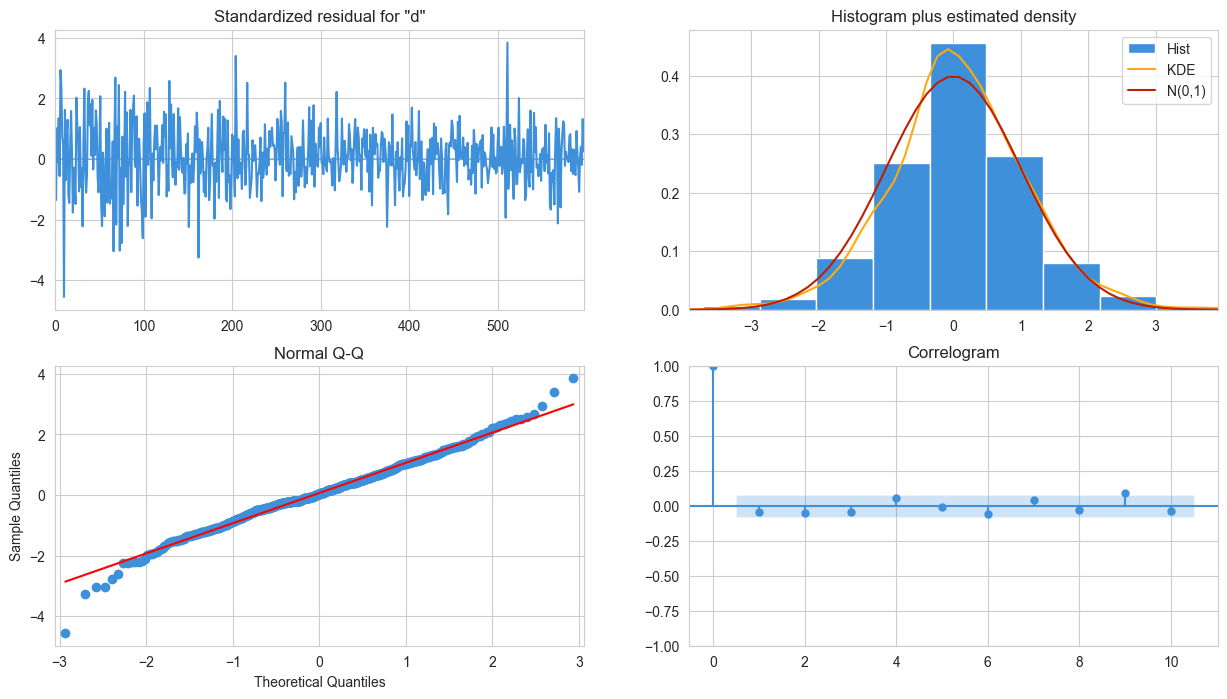

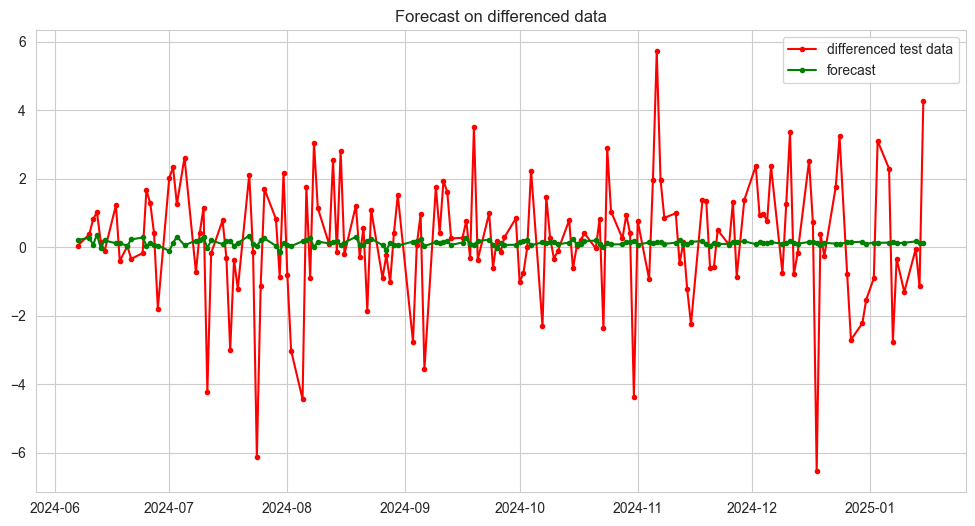

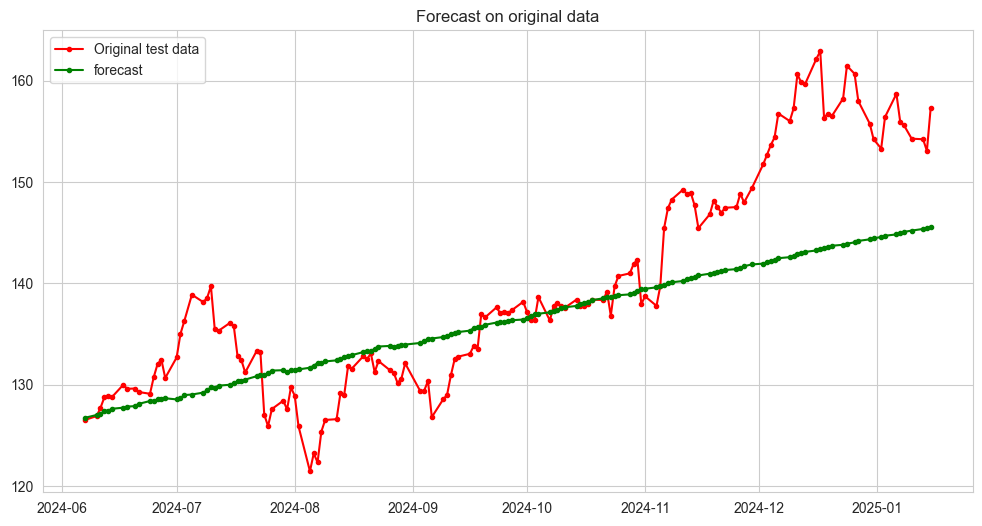

In [35]:
# working with advanced models. ARIMA and SARIMA.
# order of differencing, d = 1, D = 0, p,P and q,Q are chosen from the ACF and PACF plots.
# one can also choose the best model using the auto_arima method from the pmdarima library.
# Both ARIMA and SARIMA are fit for short-term predcitions, which is why long term predictions 
# are reflected as straight lines rather than fitting the data perfectly.


# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# model_arima = ARIMA(train_set, order=(0,1,1)) # for ARIMA model
model_arima = SARIMAX(train_set, order=(0,1,1), 
                      seasonal_order=(2,0,1,20)) # choose parameters according to best fit (best AIC score)
model_fit = model_arima.fit()
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15,8)) # diagnostics show that model is acceptable

start_a = len(train_set)
end_a = len(EWI['Norm'].dropna())-1
predictions = model_fit.predict(start=start_a+1, end=end_a, dynamic=False)
# predictions = model_fit.forecast(steps=151)
print(predictions)

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(test_set, 'r.-', label = 'differenced test data')
axes.plot(test_set.index, predictions, 'g.-', label = 'forecast')
plt.title('Forecast on differenced data')
plt.legend()

# forecasting in the original scale
last_value_arima = EWI['Norm'].iloc[train_length]
predictions_ogscale = predictions.cumsum() + last_value_arima

fig, axes = plt.subplots(figsize=(12,6))
axes.plot(EWI['Norm'][train_length:], 'r.-', label = 'Original test data')
axes.plot(test_set.index, predictions_ogscale, 'g.-', label = 'forecast')
plt.title('Forecast on original data')
plt.legend()

rmse_sarima = np.sqrt(mean_squared_error(test_set,predictions)).round(4)
rmse_sarima_og = np.sqrt(mean_squared_error(test_set_og,predictions_ogscale))
print(rmse_sarima, rmse_sarima_og)

mape_SARIMA = MAPE(test_set.values, predictions)
print(mape_SARIMA, MAPE(test_set_og.values, predictions_ogscale))




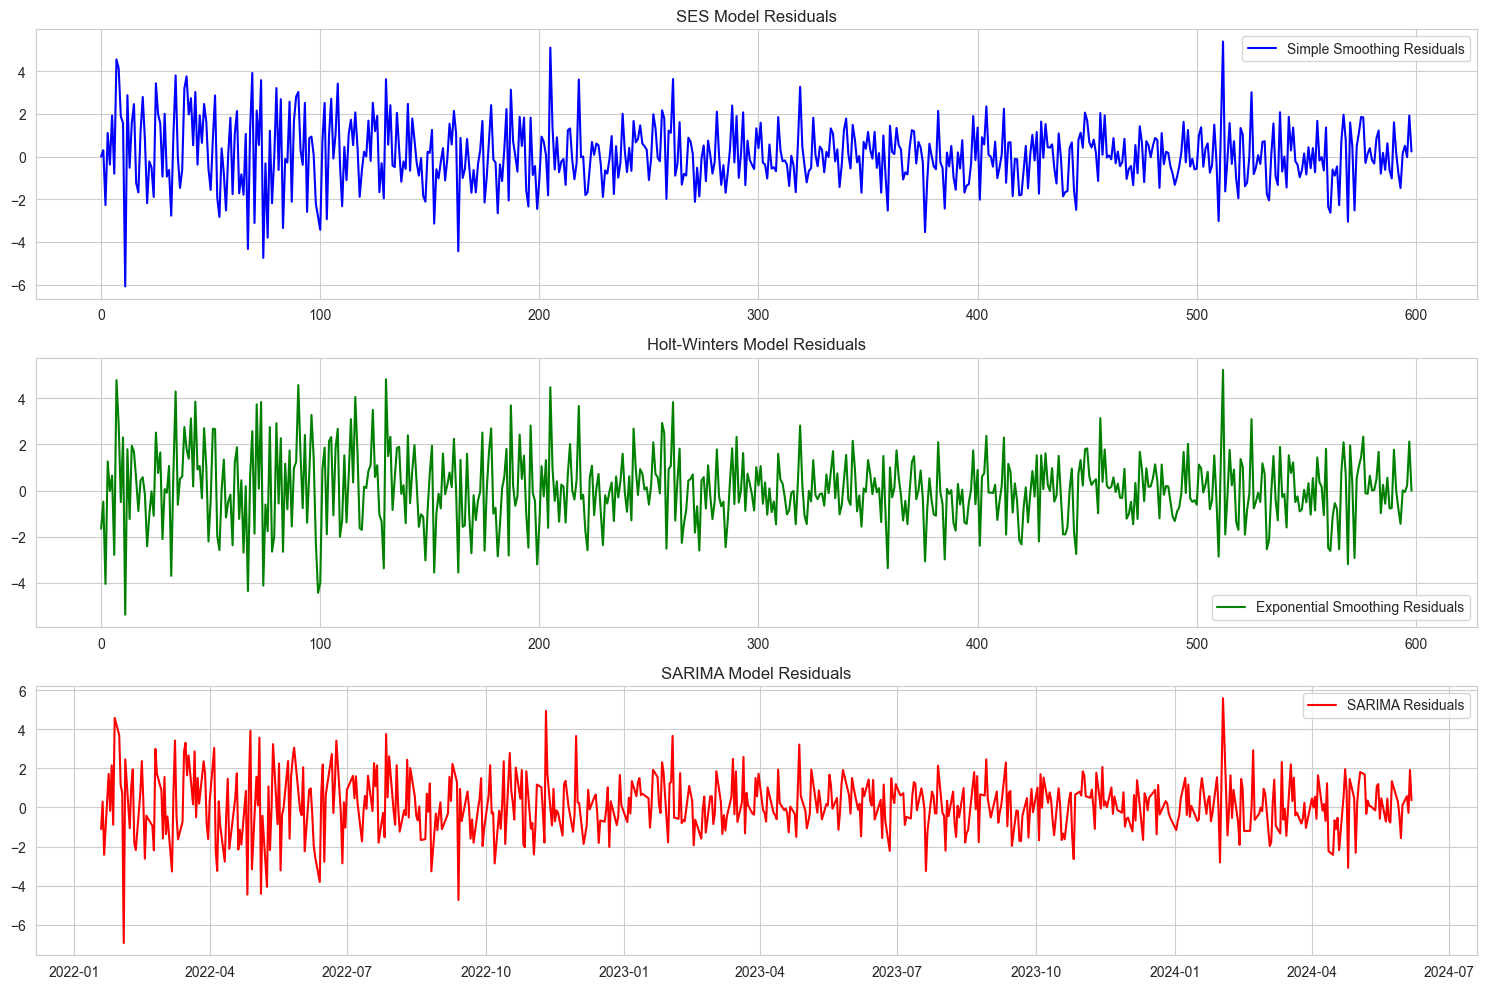

In [36]:
# residual analysis

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(model.resid, label='Simple Smoothing Residuals', color='blue')
plt.title('SES Model Residuals')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(model_es.resid, label='Exponential Smoothing Residuals', color='green')
plt.title('Holt-Winters Model Residuals')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(model_fit.resid, label='SARIMA Residuals', color='red')
plt.title('SARIMA Model Residuals')
plt.legend()

plt.tight_layout()

In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# perform Ljung-Box test on residuals with lag=2m, where m = seasonal_periods (20)
Btest_sarima = acorr_ljungbox(                             # Portmanteau test done only on sarima model 
    model_fit.resid, lags=[40], return_df=True, model_df=5 # residuals. Can be recreated for other models as well.
)

print(Btest_sarima)

      lb_stat  lb_pvalue
40  42.252061   0.186262


The portmanteau test returns a large p-value (P = 0.18624), suggesting the residuals for the sarima model are white noise.

In [38]:
# model comparison using the RMSE and MAPE value for the different models 
data = {
    'RMSE' : [rmse_sma_model, rmse_ses, rmse_es, rmse_sarima],
    'MAPE' : [mape_SMA, mape_SES, mape_ES, mape_SARIMA]
}

row_names = ['SMA', 'SES', 'ES', 'SARIMA']
model_comp = pd.DataFrame(data, index=row_names)
model_comp


,RMSE,MAPE
SMA,1.846600,485.2229
SES,1.785300,178.6827
ES,1.793303,133.2006
SARIMA,1.782000,189.7180
